# Unit 01 Task 02
> Federal University of Rio Grande do Norte  
> Technology Center  
> Department of Computer Engineering and Automation  
> Course: **Algorithms and Data Structure II (DCA3702)**  
> Author: **Augusto Matheus Pinheiro Damasceno**  
> Contact
> [augustodamasceno@protonmail.com](mailto:augustodamasceno@protonmail.com)
>
> Copyright (c) 2024, Augusto Damasceno.  
> All rights reserved.   
> SPDX-License-Identifier: BSD-2-Clause

# Libraries

In [1]:
import random
from enum import Enum
from math import log2
from collections import Counter
from itertools import combinations

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import nxviz as nv
import scipy

# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = [30, 12]

# Set Pseudo-Random Number Generation Seed for Reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

/Users/gin/git/datastructure/venv/lib/python3.12/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


# Dataset Preprocessing

## Load the dataset

In [2]:
df = pd.read_csv('scopus.csv')
df.info()
df_full = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            20000 non-null  object 
 1   Author full names  20000 non-null  object 
 2   Author(s) ID       20000 non-null  object 
 3   Title              20000 non-null  object 
 4   Year               20000 non-null  int64  
 5   Source title       20000 non-null  object 
 6   Volume             18456 non-null  object 
 7   Issue              12954 non-null  object 
 8   Art. No.           7887 non-null   object 
 9   Page start         12219 non-null  object 
 10  Page end           12047 non-null  object 
 11  Page count         12066 non-null  float64
 12  Cited by           20000 non-null  int64  
 13  DOI                19035 non-null  object 
 14  Link               20000 non-null  object 
 15  Document Type      20000 non-null  object 
 16  Publication Stage  200

In [3]:
df.head(n=3)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID
0,Palhano-Fontes F.; Cavalcanti-Ribeiro P.; da C...,"Palhano-Fontes, Fernanda (55974198400); Cavalc...",55974198400; 55366639200; 59346859800; 5933580...,Repeated subcutaneous esketamine on treatment-...,2025,Journal of Affective Disorders,369,NaN,NaN,155,163,8.0,0,10.1016/j.jad.2024.09.141,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85205231949
1,Carvalho J.C.R.D.; Costa G.L.V.D.; de Oliveira...,"Carvalho, Júlia Caroline Ribeiro de (592625321...",59262532100; 59262374600; 59174134400; 5926345...,Effect of flow patterns on recovery of inverta...,2024,Food and Bioproducts Processing,148,NaN,NaN,1,10,9.0,0,10.1016/j.fbp.2024.08.003,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85201395571
2,Santos N.C.; Almeida R.L.J.; Monteiro S.S.; de...,"Santos, Newton Carlos (57218104648); Almeida, ...",57218104648; 57217715043; 57215822816; 5741784...,Drying of avocado peels using carbonation-ultr...,2024,Chemical Engineering and Processing - Process ...,205,NaN,110004,NaN,NaN,NaN,0,10.1016/j.cep.2024.110004,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85205307320


### All rows from the columns of interest have non-null values

## Keep the columns of interest

In [4]:
df = df[['Authors', 'Author(s) ID', 'Title', 'Year', 'Cited by', 'Document Type']]
df.head(n=3)

,Authors,Author(s) ID,Title,Year,Cited by,Document Type
0,Palhano-Fontes F.; Cavalcanti-Ribeiro P.; da C...,55974198400; 55366639200; 59346859800; 5933580...,Repeated subcutaneous esketamine on treatment-...,2025,0,Article
1,Carvalho J.C.R.D.; Costa G.L.V.D.; de Oliveira...,59262532100; 59262374600; 59174134400; 5926345...,Effect of flow patterns on recovery of inverta...,2024,0,Article
2,Santos N.C.; Almeida R.L.J.; Monteiro S.S.; de...,57218104648; 57217715043; 57215822816; 5741784...,Drying of avocado peels using carbonation-ultr...,2024,0,Article


## Use Year of 2020

In [5]:
df = df[(df['Year'] == 2020)]
df.shape

(2081, 6)

# Graph Construction

In [6]:
authors_lists = [[author.strip() for author in row.split(';')]  for row in df['Author(s) ID']]
G = nx.Graph()
for co_authors_pub in authors_lists:
    G.add_nodes_from(co_authors_pub)
    G.add_edges_from(combinations(co_authors_pub, 2))

# Network Density
> Sparsely connected

In [7]:
density = nx.density(G)
density

0.026622982635179857

In [8]:
random_nodes = [random.choice(list(G.nodes())) for i in range(10)]
for idx, node in enumerate(random_nodes):
    neighbors = list(G.edges(node))
    print(f"Random Node {node} has {len(neighbors)} neighbors\n")

Random Node 57220930143 has 82 neighbors

Random Node 57203104226 has 1775 neighbors

Random Node 55957434200 has 212 neighbors

Random Node 55583725800 has 727 neighbors

Random Node 24335894000 has 1197 neighbors

Random Node 6508226260 has 18 neighbors

Random Node 57201615495 has 998 neighbors

Random Node 22633361900 has 6 neighbors

Random Node 6602225064 has 727 neighbors

Random Node 57201501662 has 1775 neighbors



# Subgraph


In [9]:
def subgraph_degree(graph, degree):
    assert isinstance(degree, int) and degree >= 0, 'degree must be non-negative'
    assert isinstance(graph, nx.classes.graph.Graph), 'graph must be networkx.classes.graph.Graph'

    nodes_subgraph = [node for node, deg in graph.degree() if deg >= degree]
    subgraph = graph.subgraph(nodes_subgraph).copy()
    
    return subgraph

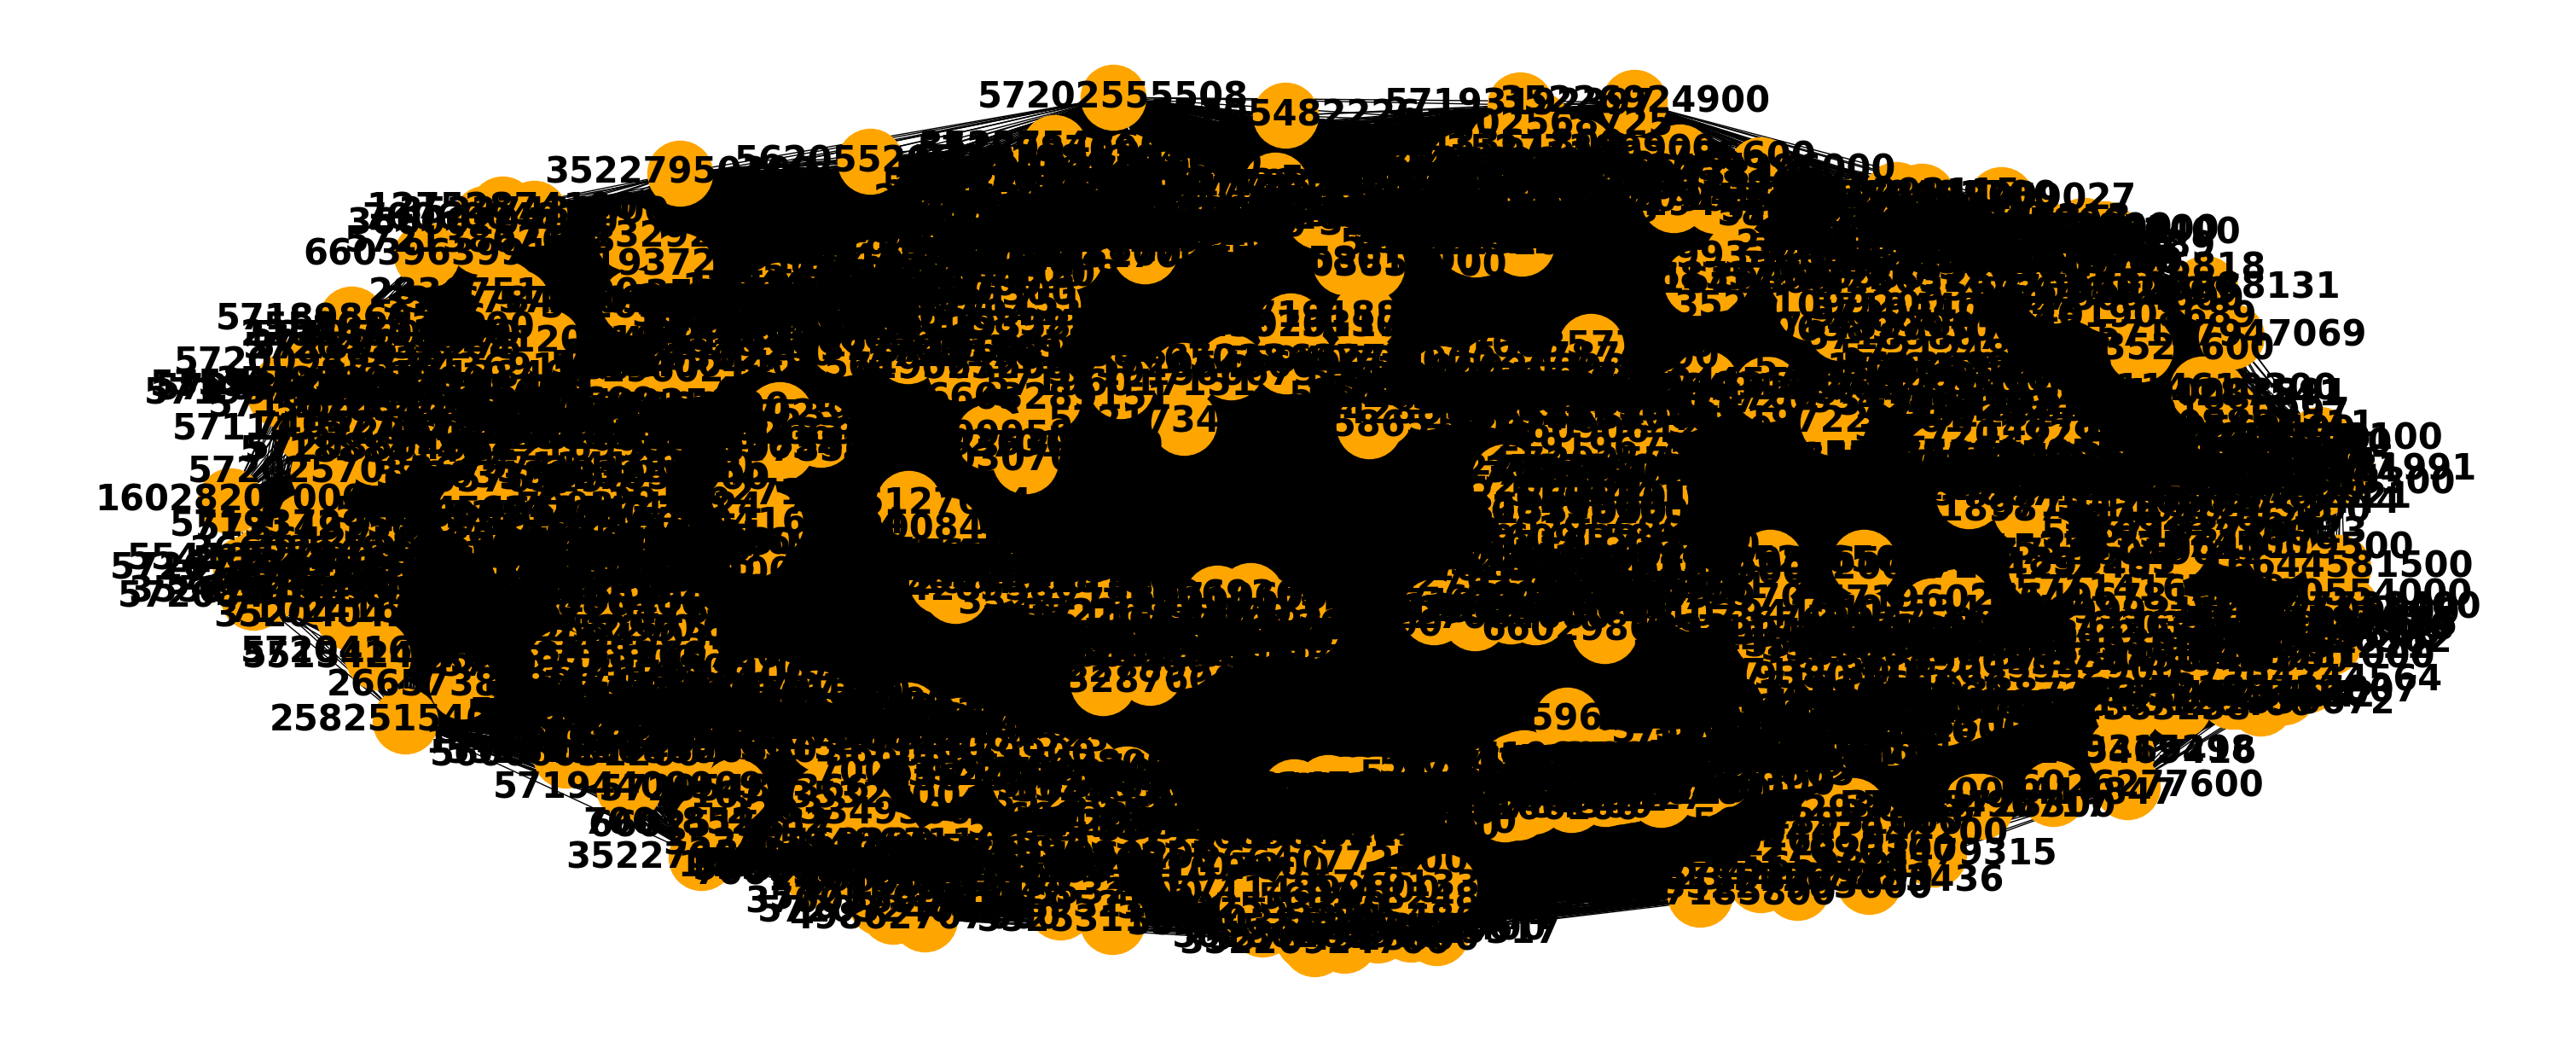

In [15]:
sg = subgraph_degree(graph=G, degree=1700)
nx.draw(sg, with_labels=True, node_color='orange', node_size=3000, font_weight='bold', font_size=30)
plt.show()

# Degree Histogram

In [29]:
degree_data  = [zip(*nx.average_degree_connectivity(subgraph_degree(G, deg)).items()) for deg in range(1, 10)]
degree_data

In [34]:
degree_data[0]

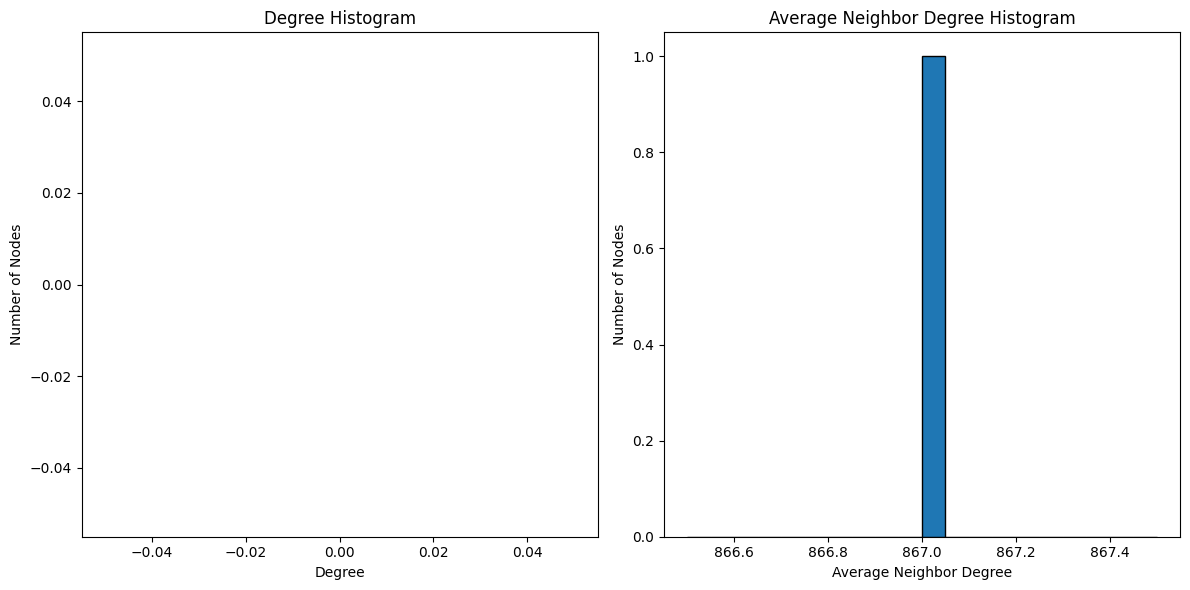

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.hist(degree_data[1, :], bins=range(min(degree), max(degree) + 1), edgecolor='black', align='left')
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.subplot(1, 2, 2)
plt.hist(degree_data[1, :], bins=10, edgecolor='black')
plt.title('Average Neighbor Degree Histogram')
plt.xlabel('Average Neighbor Degree')
plt.ylabel('Number of Nodes')

plt.tight_layout()
plt.show()

# References

1. **Python Standard Library - `random` module**  
   PYTHON SOFTWARE FOUNDATION. Python 3.10 Documentation: Random - Generate pseudo-random numbers. Available at: <https://docs.python.org/3/library/random.html>. Accessed on: 08 Oct. 2024.

2. **Python Standard Library - `enum` module**  
   PYTHON SOFTWARE FOUNDATION. Python 3.10 Documentation: Enum — Support for enumerations. Available at: <https://docs.python.org/3/library/enum.html>. Accessed on: 08 Oct. 2024.

3. **NumPy Library**  
   HARRIS, C. R. et al. Array programming with NumPy. Nature, v. 585, p. 357–362, 2020. Available at: <https://numpy.org/>. Accessed on: 08 Oct. 2024.

4. **Pandas Library**  
   MCKINNEY, W. Data structures for statistical computing in Python. In: PROC. 9th PYTHON IN SCIENCE CONF. Austin, TX, 2010. Available at: <https://pandas.pydata.org/>. Accessed on: 08 Oct. 2024.

5. **Plotly Library**  
   PLOTLY TECHNOLOGIES INC. Plotly Graphing Libraries. Available at: <https://plotly.com/python/>. Accessed on: 08 Oct. 2024.

6. **Matplotlib Library**  
   HUNTER, J. D. Matplotlib: A 2D graphics environment. Computing in Science & Engineering, v. 9, p. 90-95, 2007. Available at: <https://matplotlib.org/>. Accessed on: 08 Oct. 2024.

7. **The Story Behind Random Seed 42**  
   GEEKCULTURE. The story behind random seed 42 in machine learning. Available at: <https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a>. Accessed on: 08 Oct. 2024.

8. **Math Library**  
   Available at: https://docs.python.org/3/library/math.html.  Accessed on: 08 Oct. 2024.

9. **Collections Library**  
   Available at: https://docs.python.org/3/library/collections.html. Accessed on: 08 Oct. 2024.


10. **Networkx Library**
    Hagberg, A., Schult, D., & Swart, P. NetworkX: Python Software for the Creation, Manipulation, and Study of the Structure, Dynamics, and Functions of Complex Networks. Available at: https://networkx.github.io/. Accessed on: 08 Oct. 2024.

11. PYTHON SOFTWARE FOUNDATION. Python 3.10 Documentation: Itertools — Functions creating iterators for efficient looping. Available at: <https://docs.python.org/3/library/itertools.html>. Accessed on: 08 Oct. 2024.

12. **nxviz Library**: Visualizing Network Data in Python. Available at: <https://nxviz.readthedocs.io/>. Accessed on: 08 Oct. 2024.

13. VIRTANEN, Pauli et al. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature Methods, v. 17, p. 261–272, 2020. Available at: <https://scipy.org/>. Accessed on: 08 Oct. 2024.